# 목표

- ## 이미지의 픽셀이 무엇인지 이해하고, 픽셀값을 출력, 변경
- ## RGB 채널 분리, 병합 해보기
<br>

## 이미지 처리

### 1. 픽셀 기반 이미지 처리(* 픽셀 : 이미지를 구성하는 작은 단위)
    - 이미지를 픽셀단위로 처리하는 방법(픽셀의 수에 따라 달라진다.)
    - 픽셀 단위로 묶어서 활용
### 2. 블록 기반 이미지 처리
    - 이미지를 블록(픽셀을 그룹화)단위로 처리하는 방법(가장 많이 사용)
    - 이미지의 지역(구역)적인 특성을 표현
    - 처리 속도 상대적 빠름
### 3. 주파수 기반의 이미지 처리
    - 이미지를 주파수 영역으로 변환하여 처리


### 픽셀(pixel : picture cell)
    - 이미지를 구성하는 최소단위
    - 0 ~ 255 값으로 구성 (0 : 흑 , 255 : 백)
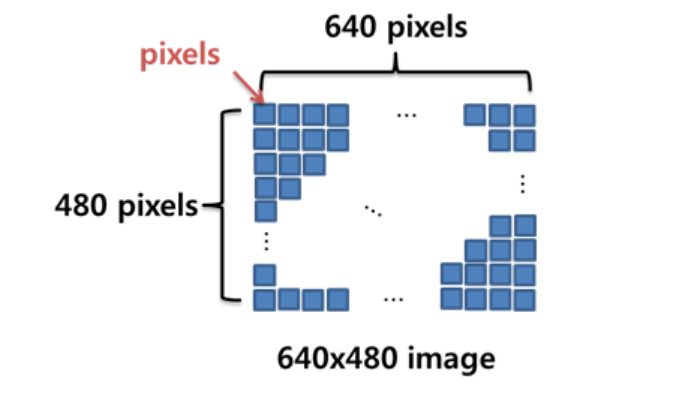


### 블록(block)
    - 근방의 픽셀등르 그룹화
    - 이웃의 픽셀들은 유사한 특성을 가진다는 것을 가정
    - 일반적으로 블럭간의 중복을 시켜서 처리
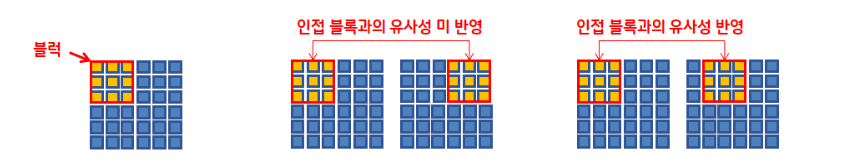

### 주파수(frequency)
    - 이미지의 픽셀 값의 변화분을 수치화


In [1]:
import cv2
import matplotlib.pyplot as plt

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   1   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

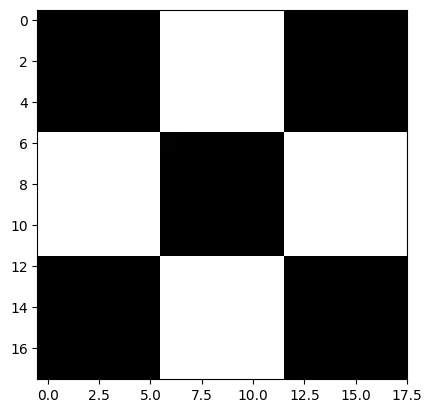

In [5]:
checker = cv2.imread('./img/checker_board.jpg',cv2.IMREAD_GRAYSCALE)

plt.imshow(checker, cmap='gray')
print(checker)

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

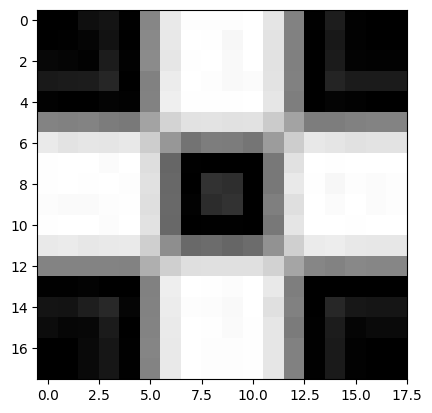

In [6]:
checker2 = cv2.imread('./img/check_board2.jpg',cv2.IMREAD_GRAYSCALE)
print(checker2)
plt.imshow(checker2, cmap='gray')

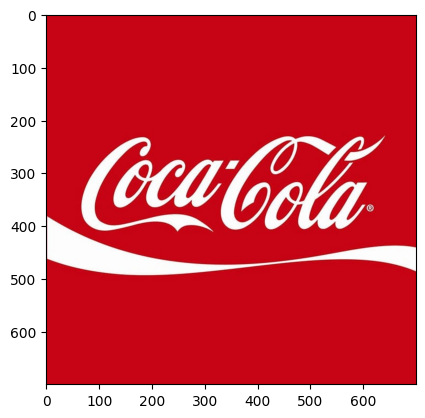

In [9]:
cola = cv2.imread('./img/cola.jpg', cv2.IMREAD_COLOR)
cvt = cv2.cvtColor(cola, cv2.COLOR_BGR2RGB)
plt.imshow(cvt)

In [10]:
print(cvt.shape)

(700, 700, 3)


[[21 21 21 ... 21 21 21]
 [21 21 21 ... 21 21 21]
 [21 21 21 ... 21 21 21]
 ...
 [21 21 21 ... 21 21 21]
 [21 21 21 ... 21 21 21]
 [21 21 21 ... 21 21 21]]


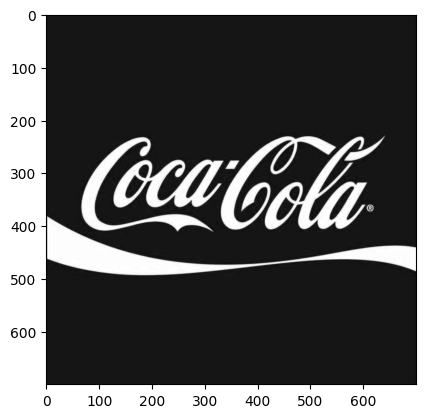

In [15]:
# BLUE 채널만 가져오기
plt.imshow(cvt[:,:,2],cmap='gray')
print(cvt[:,:,2])

# blue 채널에는 0값이 다수 존재 -> 파란색 큰 영향을 미치지 않고 있음을 의미
# 가운데 cola 글씨 255 
# 각각의 채널들은 흑과 백으로 구성
# 채널의 3개가 겹치면서 색이 출력되는 원리

[[199 199 199 ... 199 199 199]
 [199 199 199 ... 199 199 199]
 [199 199 199 ... 199 199 199]
 ...
 [199 199 199 ... 199 199 199]
 [199 199 199 ... 199 199 199]
 [199 199 199 ... 199 199 199]]


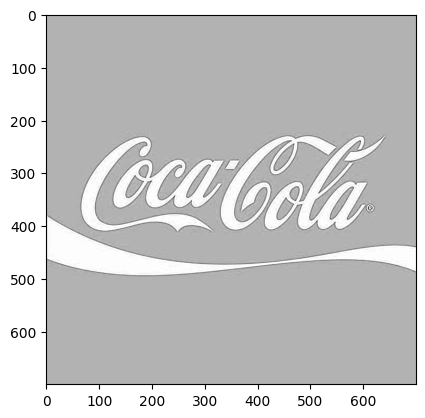

In [17]:
plt.imshow(cvt[:,:,0],cmap='gray')
print(cvt[:,:,0])



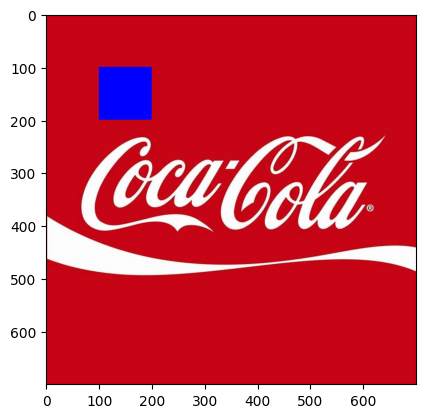

In [19]:
cvt[100:200,100:200] = [0,0,255]
plt.imshow(cvt)

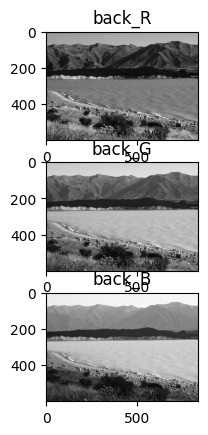

In [20]:
back = cv2.imread('./img/back.jpg')

back_B = back[:,:,0]
back_G = back[:,:,1]
back_R = back[:,:,2]

plt.subplot(1,3,1)
plt.title('back_R')
plt.imshow(back_R,cmap='gray')
plt.subplot(1,3,2)
plt.title('back_G')
plt.imshow(back_G,cmap='gray')
plt.subplot(1,3,3)
plt.title('back_B')
plt.imshow(back_B,cmap='gray')